In [ ]:
# -*- coding: utf-8 -*-
import openmc
import os
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from pathlib import Path
import numpy as np
import pandas as pd

In [4]:
from pathlib import Path
import sys 
CWD = Path.cwd().resolve()
project_root = Path.cwd().parents[2]
sys.path.append(str(project_root))
from src.utils.common.isotope import Radionuclide_lara

In [5]:
df = pd.read_csv("rn.csv", sep=";")
# modify the format of the Radionuclide name : change 54Mn to Mn-54 for example
df["Radionuclide"] = df["Radionuclide"].apply(lambda x: f"{''.join(filter(str.isalpha, x))}-{''.join(filter(str.isdigit, x))}")

In [6]:
dict_rn = df.set_index("Radionuclide").to_dict()["Mass[g]"]


In [7]:
dict_rn

{'Mn-54': 0.0002,
 'Co-58': 0.0003,
 'Co-60': 0.0005,
 'Fe-59': 0.0001,
 'Cr-51': 0.0004,
 'Co-57': 0.0002,
 'Zn-65': 0.0001,
 'Fe-55': 0.0002,
 'Mn-56': 0.0003,
 'Na-22': 0.0001}

In [ ]:
def compute_total_weight(dict_rn, time=0):
    rays = []
    weights = []
    for rn, mass in dict_rn.items():
        rn_lara = Radionuclide_lara(rn)
        energy, intensity, _ = rn_lara.get_rays_emission_data(photon_only=True)
        act = rn_lara.get_activity_after_time(mass=mass, time=time)
        rays.extend(energy)
        weights.extend(intensity * act)
    total_weight = sum(weights)
    return rays, weights, total_weight

Calcul du terme source après 0 seconde

In [22]:
rays, weights, total_weight = compute_total_weight(dict_rn, time=0)

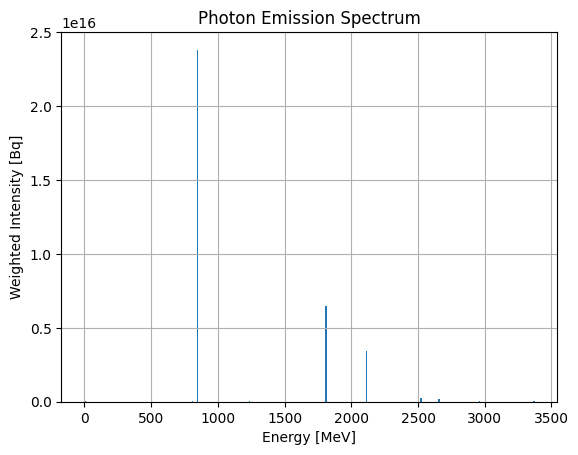

In [26]:
plt.bar(rays, weights, width=10)
plt.xlabel("Energy [MeV]")
plt.ylabel("Weighted Intensity [Bq]")
plt.title("Photon Emission Spectrum")
plt.grid(True)
plt.show()

In [ ]:
rays, weights, total_weight = compute_total_weight(dict_rn, time=3600*24*7)

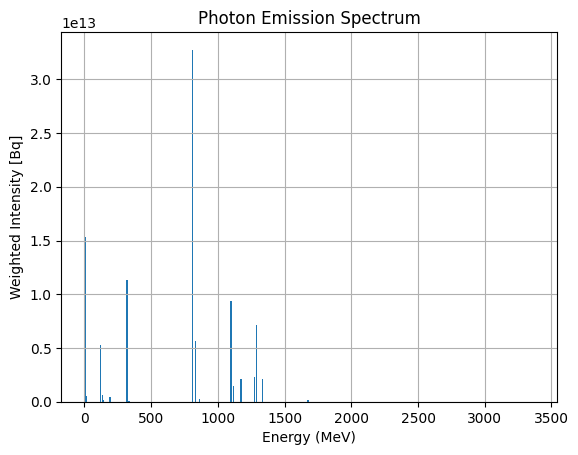

In [ ]:
plt.bar(rays, weights, width=10)
plt.xlabel("Energy [MeV]")
plt.ylabel("Weighted Intensity [Bq]")
plt.title("Photon Emission Spectrum")
plt.grid(True)
plt.show()

Caclcul of the activity after several points of time

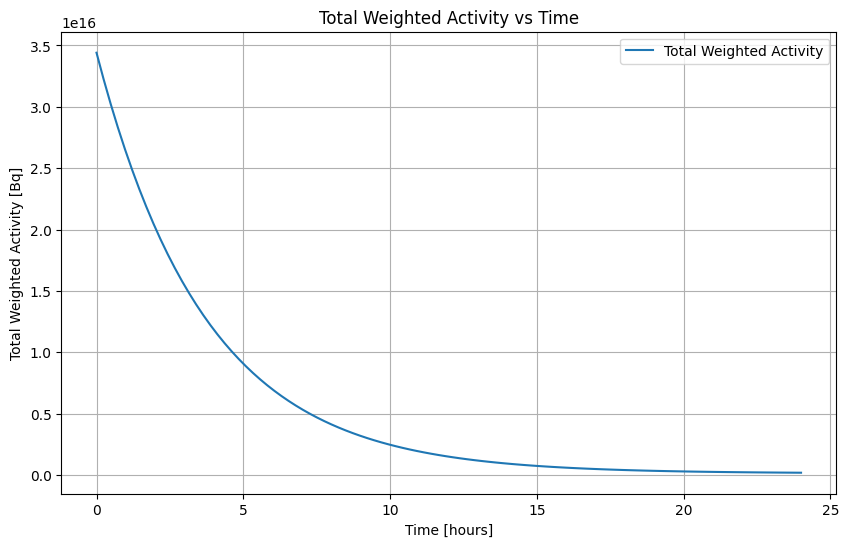

In [27]:
time_points = np.linspace(0, 3600 * 24, 100)  # 1 day in seconds
def compute_total_activity(dict_rn, time_points):
    total_weight_at_time = []
    for time in time_points:
        _, _, total_weight = compute_total_weight(dict_rn, time=time)
        total_weight_at_time.append(total_weight)
    return total_weight_at_time

total_weight_at_time = compute_total_activity(dict_rn, time_points)

plt.figure(figsize=(10, 6))
plt.plot(time_points / 3600, total_weight_at_time, label="Total Weighted Activity")
plt.xlabel("Time [hours]")
plt.ylabel("Total Weighted Activity [Bq]")
plt.title("Total Weighted Activity vs Time")
plt.legend()
plt.grid(True)
plt.show()

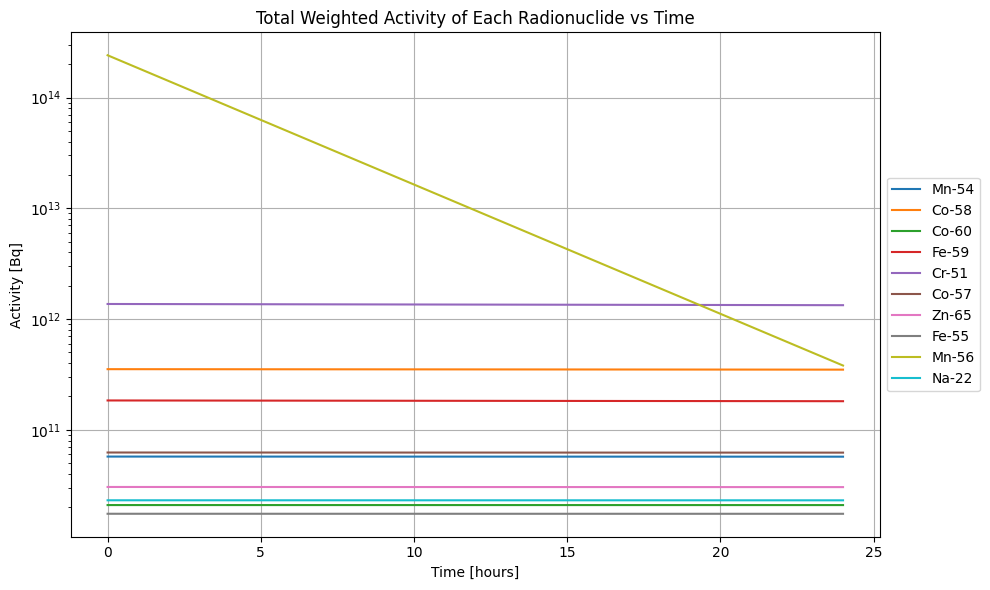

In [ ]:
# plot the total weighted activity of every radionuclide vs time
# Calculate and plot the total weighted activity of every radionuclide vs time

time_points = np.linspace(0, 3600 * 24, 100)  # 1 day in seconds
total_weights_per_rn = {}
for rn, mass in dict_rn.items():
    rn_lara = Radionuclide_lara(rn)
    # Compute activity at each time point for this radionuclide
    activities = np.array([rn_lara.get_activity_after_time(mass=mass, time=t) for t in time_points])
    total_weights_per_rn[rn] = activities

plt.figure(figsize=(10, 6))
for rn, activities in total_weights_per_rn.items():
    plt.plot(time_points / (3600), activities, label=rn)
plt.xlabel("Time [hours]")
plt.ylabel("Activity [Bq]")
plt.title("Total Weighted Activity of Each Radionuclide vs Time")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.yscale("log")
plt.grid(True)
plt.tight_layout()
plt.show()

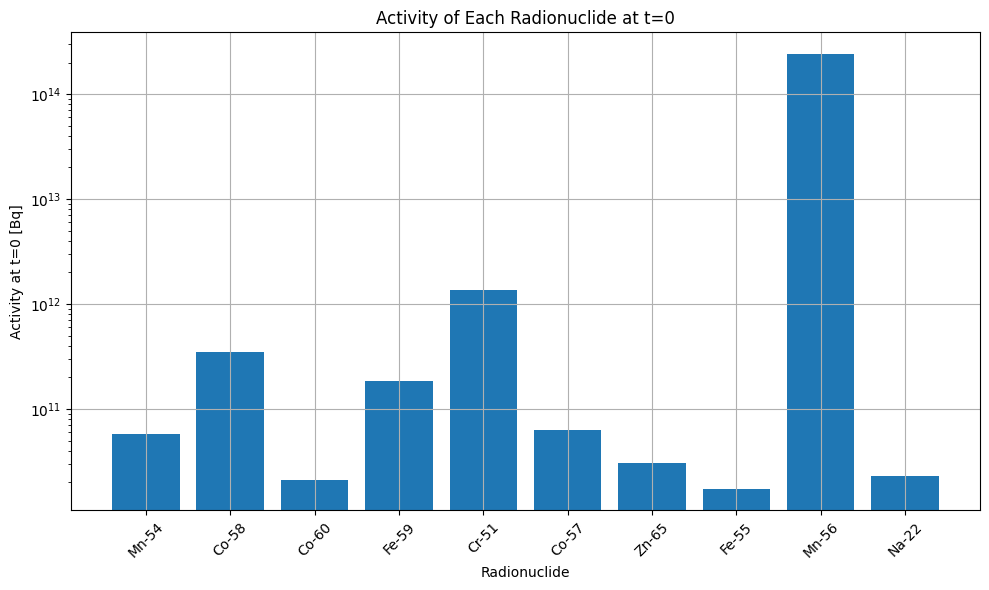

In [18]:
# plot an histogramn of the activity of every radionuclide at t=0

total_weights_per_rn = {}
for rn, mass in dict_rn.items():
    rn_lara = Radionuclide_lara(rn)
    activity_t0 = rn_lara.get_activity_after_time(mass=mass, time=0)
    total_weights_per_rn[rn] = np.array([activity_t0])

activities_at_t0 = {rn: activities[0] for rn, activities in total_weights_per_rn.items()}

plt.figure(figsize=(10, 6))
plt.bar(activities_at_t0.keys(), activities_at_t0.values())
plt.xlabel("Radionuclide")
plt.ylabel("Activity at t=0 [Bq]")
plt.title("Activity of Each Radionuclide at t=0")
plt.yscale("log")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()